# Import Dataset 

In [9]:
# Install the Kaggle library
!pip install kaggle

In [10]:
# Memindahkan File Konfigurasi Kaggle ke Direktori yang Sesuai
!mv kaggle.json ~/.kaggle/

In [11]:
# Konfigurasi Hak Akses File Kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
# Unduh Dataset dari Kaggle
! kaggle datasets download hannanhunafa/javanese-script-aksara-jawa-augmented --force


  0%|          | 0.00/132M [00:00<?, ?B/s]
  1%|          | 1.00M/132M [00:02<05:33, 412kB/s]
  2%|1         | 2.00M/132M [00:12<15:07, 150kB/s]
  2%|2         | 3.00M/132M [00:18<14:05, 160kB/s]
  3%|3         | 4.00M/132M [00:25<14:39, 153kB/s]
  4%|3         | 5.00M/132M [00:31<13:21, 166kB/s]
  5%|4         | 6.00M/132M [00:43<17:10, 128kB/s]
  5%|5         | 7.00M/132M [00:51<17:14, 127kB/s]
  6%|6         | 8.00M/132M [00:53<13:08, 165kB/s]
  7%|6         | 9.00M/132M [01:01<14:02, 153kB/s]
  8%|7         | 10.0M/132M [01:02<10:15, 208kB/s]
  8%|8         | 11.0M/132M [01:06<09:17, 228kB/s]
  9%|9         | 12.0M/132M [01:08<07:35, 277kB/s]
 10%|9         | 13.0M/132M [01:12<07:43, 270kB/s]
 11%|#         | 14.0M/132M [01:14<06:46, 305kB/s]
 11%|#1        | 15.0M/132M [01:16<05:46, 355kB/s]
 12%|#2        | 16.0M/132M [01:18<04:58, 408kB/s]
 13%|#2        | 17.0M/132M [01:19<04:20, 464kB/s]
 14%|#3        | 18.0M/132M [01:21<04:04, 491kB/s]
 14%|#4        | 19.0M/132M [01:22<03:

In [14]:
import zipfile

# Nama file zip Anda
zip_file = 'javanese-script-aksara-jawa-augmented.zip'

# Direktori tempat Anda ingin mengekstrak file-file dari zip
extracted_dir = 'dataset/'

# Membuka file zip
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    # Mengekstrak semua file ke dalam direktori tujuan
    zip_ref.extractall(extracted_dir)

print(f'Dataset telah diekstrak ke {extracted_dir}')

Dataset telah diekstrak ke dataset/


# Preprocessing

# Data Visualization

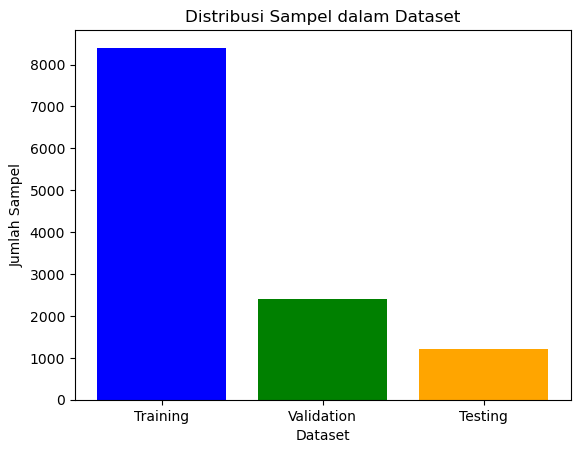

In [24]:
import os

# Ganti dengan path sesuai dengan struktur dataset Anda
train_dir = '../TA/dataset/train'
val_dir = '../TA/dataset/val'
test_dir = '../TA/dataset/test'

# Mendapatkan daftar semua kelas dalam set pelatihan
train_classes = os.listdir(train_dir)
val_classes = os.listdir(val_dir)
test_classes = os.listdir(test_dir)

# Inisialisasi variabel untuk menyimpan jumlah sampel
num_train = 0
num_val = 0
num_test = 0

# Menghitung jumlah sampel dalam setiap kelas untuk set pelatihan
for class_train in train_classes:
    class_path_train = os.path.join(train_dir, class_train)
    if os.path.isdir(class_path_train):
        num_train += len(os.listdir(class_path_train))

# Menghitung jumlah sampel dalam setiap kelas untuk set validasi
for class_val in val_classes:
    class_path_val = os.path.join(val_dir, class_val)
    if os.path.isdir(class_path_val):
        num_val += len(os.listdir(class_path_val))
        
# Menghitung jumlah sampel dalam setiap kelas untuk set testing
for class_test in test_classes:
    class_path_test = os.path.join(test_dir, class_test)
    if os.path.isdir(class_path_test):
        num_test += len(os.listdir(class_path_test))

# Menyiapkan data untuk visualisasi
categories = ['Training', 'Validation', 'Testing']
sample_counts = [num_train, num_val, num_test]

# Membuat grafik batang
plt.bar(categories, sample_counts, color=['blue', 'green', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Sampel dalam Dataset')
plt.show()

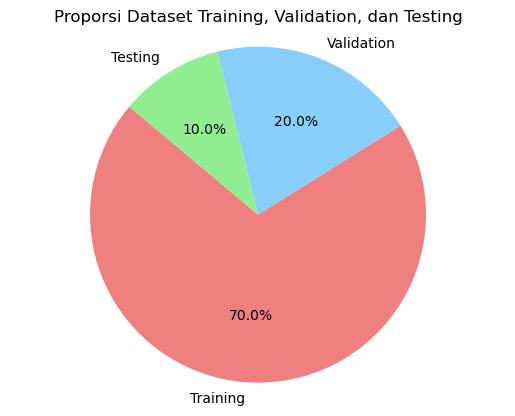

In [23]:
import matplotlib.pyplot as plt

# Ganti dengan jumlah dataset sesuai dengan proyek Anda
num_training_samples = 8400 
num_validation_samples = 2400 
num_testing_samples = 1200 

# Menyiapkan data untuk pie chart
labels = ['Training', 'Validation', 'Testing']
sizes = [num_training_samples, num_validation_samples, num_testing_samples]
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
explode = (0, 0, 0)  # Menonjolkan sektor pertama (opsional)

# Membuat pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Proporsi Dataset Training, Validation, dan Testing')

# Menampilkan pie chart
plt.axis('equal')  # Memastikan diagram lingkaran berbentuk lingkaran
plt.show()

# Mode-1

In [4]:
import os

data = './dataset/'
os.listdir(data)

['predict_test', 'test', 'train', 'val']

In [5]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16

# Buat model VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Bekukan lapisan-lapisan pada base model
for layer in base_model.layers:
    layer.trainable = False

# Tambahkan lapisan-lapisan tambahan untuk tugas klasifikasi khusus Anda
additional_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(7, 7, 512)),  # Ganti shape sesuai output VGG16
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Ganti 10 dengan jumlah kelas Anda
])

# Gabungkan model VGG16 dengan lapisan-lapisan tambahan
model = Sequential([
    base_model,
    additional_model
])

# Tampilkan ringkasan arsitektur model
model.summary()


58889256/58889256 [==============================] - 31s 1us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 sequential (Sequential)     (None, 10)                394954    
                                                                 
Total params: 15109642 (57.64 MB)
Trainable params: 394954 (1.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


# Model-2


In [24]:
# !pip install imutils

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing import image as img_
# from keras.metrics import categorical_accuracy
# from keras.models import Sequential, load_model
# from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# import matplotlib.pyplot as plt
# import cv2
# import seaborn as sns
# import numpy as np
# import os
# %matplotlib inline

In [5]:
from keras.preprocessing.image import ImageDataGenerator

# Generator data gambar dengan rescaling
image_generator = ImageDataGenerator(
    rescale=1./255,
)

# Tentukan ukuran gambar
size = (224, 224)
batch = 32

# Tentukan jalur direktori untuk data latih, validasi, dan uji
train_dir = '../Oprek/data_split/train'
val_dir = '../Oprek/data_split/val'
test_dir = '../Oprek/data_split/test'

# Alirkan data dari direktori untuk data latih
train_data = image_generator.flow_from_directory(
    train_dir,
    target_size=size,
    batch_size=batch,
    class_mode='categorical',
    color_mode='rgb'
)

# Alirkan data dari direktori untuk data validasi
validation_data = image_generator.flow_from_directory(
    val_dir,
    target_size=size,
    batch_size=batch,
    class_mode='categorical',
    color_mode='rgb'
)

# Alirkan data dari direktori untuk data uji
test_data = image_generator.flow_from_directory(
    test_dir,
    target_size=size,
    batch_size=batch,
    class_mode='categorical',
    color_mode='rgb'
)

Found 10500 images belonging to 20 classes.
Found 3000 images belonging to 20 classes.
Found 1500 images belonging to 20 classes.


In [6]:
def switch_dict_key_values(this_dict):
    return dict((v,k) for k,v in this_dict.items())

classes_name = switch_dict_key_values(train_data.class_indices)
print(classes_name)

{0: 'ba', 1: 'ca', 2: 'da', 3: 'dha', 4: 'ga', 5: 'ha', 6: 'ja', 7: 'ka', 8: 'la', 9: 'ma', 10: 'na', 11: 'nga', 12: 'nya', 13: 'pa', 14: 'ra', 15: 'sa', 16: 'ta', 17: 'tha', 18: 'wa', 19: 'ya'}


## Create CNN Model Architecture

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Jumlah filter pada setiap lapisan Conv2D
# filters = 64
filters = 32

# Ukuran kernel
kernel = 3

# Membuat model Sequential
model = Sequential()

# Lapisan Conv2D pertama dengan input shape
model.add(Conv2D(filters=filters, kernel_size=kernel, input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Lapisan Conv2D kedua
model.add(Conv2D(filters=2 * filters, kernel_size=kernel, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Lapisan Conv2D ketiga
model.add(Conv2D(filters=4 * filters, kernel_size=kernel, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Lapisan Conv2D keempat
model.add(Conv2D(filters=8 * filters, kernel_size=kernel, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer untuk mengubah matriks menjadi vektor
model.add(Flatten())

# Lapisan Dense (fully connected) pertama
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# Lapisan Dense terakhir dengan output 20 dan aktivasi softmax
model.add(Dense(20, activation='softmax'))

# Mengompilasi model dengan categorical crossentropy loss dan SGD optimizer
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

## Training Process

In [8]:
# Membuat Callback
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

class Callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.95:
            print("\nMencapai akurasi %2.2f%%, pelatihan dihentikan" % (logs.get('accuracy') * 100))
            self.model.stop_training = True

callbacks = Callbacks()

In [ ]:
# Menjalankan pelatihan dengan callback
r = model.fit(
    train_data, 
    epochs=5,
    validation_data=validation_data,
    callbacks = [callbacks]
)

Epoch 1/5
329/329 [==============================] - 1751s 5s/step - loss: 2.9942 - accuracy: 0.0546 - val_loss: 2.9836 - val_accuracy: 0.0510
Epoch 2/5
329/329 [==============================] - 1685s 5s/step - loss: 2.9372 - accuracy: 0.0981 - val_loss: 2.7773 - val_accuracy: 0.1770
Epoch 3/5
270/329 [=======================>......] - ETA: 9:34 - loss: 2.6773 - accuracy: 0.1785

Text(0.5, 1.0, 'Accuracy Evolution')

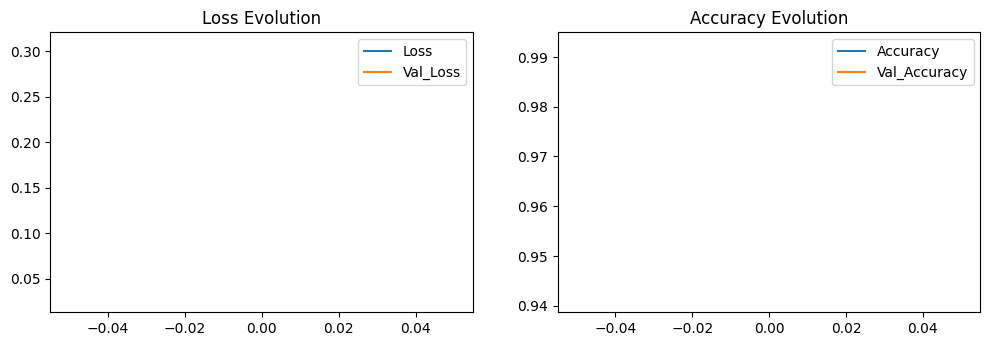

In [44]:
# visualisasi hasil data training (Plot accuracy & loss model)
import matplotlib.pyplot as plt

acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(15, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()